In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Muestreo Thompson

In [2]:
#Apertura de archivo csv a un dataframe de pandas

#revisar la ruta para tu caso particular
ruta = "c:\\Users\\jrgui\\Documents\\GitHub\\Machine_Learning\\Aprendizaje_por_Refuerzo\\datasets\\Ads_CTR_Optimisation.csv"
dataset = pd.read_csv(ruta)
dataset.head(5)

# El dataset es de 10 anuncios y 
# sobre 10 000 usuarios que hacen click sobre el anuncio

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


Número de anuncios clickeados de la selección aleatoria: 1248


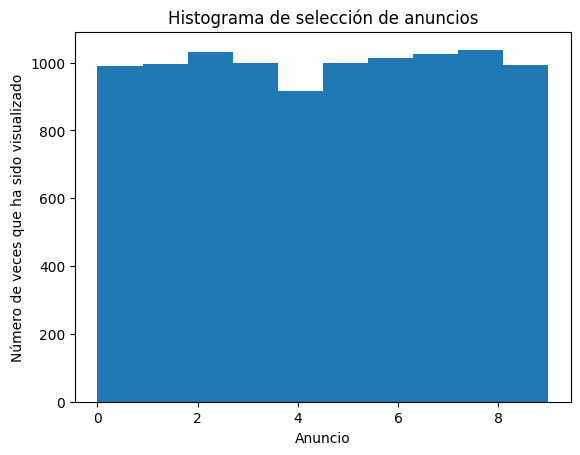

In [4]:
#Seleccion aleatoria
#para cada uno de las filas(usuarios) se escoge uno de las columnas(anuncios)

import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    #numero de usuarios han dado click a anuncion predicho
    total_reward = total_reward + reward

print("Número de anuncios clickeados de la selección aleatoria:",total_reward)

# Visualizar los resultados - Histograma
plt.hist(ads_selected)
plt.title('Histograma de selección de anuncios')
plt.xlabel('Anuncio')
plt.ylabel('Número de veces que ha sido visualizado')
plt.show()

Número de anuncios clickeados con muestreo thompson: 2614


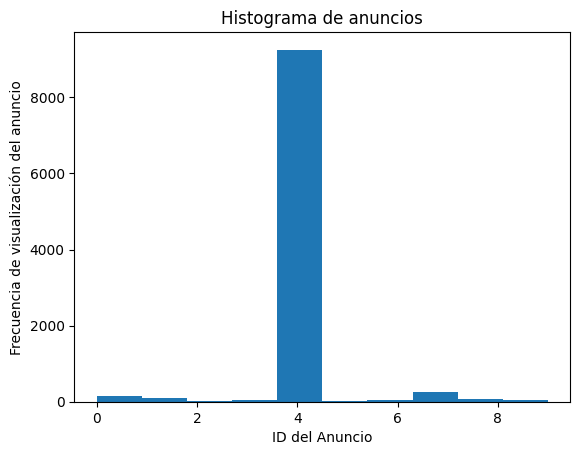

In [3]:
# Algoritmo de Muestreo Thompson
import random
N = 10000
d = 10
number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d
ads_selected = []
total_reward = 0
for n in range(0, N):
    max_random = 0
    ad = 0
    for i in range(0, d):
        random_beta = random.betavariate(number_of_rewards_1[i]+1, number_of_rewards_0[i]+1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        number_of_rewards_1[ad] = number_of_rewards_1[ad] + 1
    else:
        number_of_rewards_0[ad] = number_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

print("Número de anuncios clickeados con muestreo thompson:",total_reward)

# Histograma de resultados
plt.hist(ads_selected)
plt.title("Histograma de anuncios")
plt.xlabel("ID del Anuncio")
plt.ylabel("Frecuencia de visualización del anuncio")
plt.show()